In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# df = pd.read_csv('Mumbai.csv', index_col=False)
# df = pd.read_csv('Delhi.csv', index_col=False)
df = pd.read_csv('Bangalore.csv', index_col=False)
# df = pd.read_csv('Chennai.csv', index_col=False)
# df = pd.read_csv('Kolkata.csv', index_col=False)
# df = pd.read_csv('Hyderabad.csv', index_col=False)

In [3]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [5]:
df.describe

<bound method NDFrame.describe of          Price  Area                         Location  No. of Bedrooms  \
0     30000000  3340                 JP Nagar Phase 1                4   
1      7888000  1045       Dasarahalli on Tumkur Road                2   
2      4866000  1179  Kannur on Thanisandra Main Road                2   
3      8358000  1675                     Doddanekundi                3   
4      6845000  1670                          Kengeri                3   
...        ...   ...                              ...              ...   
6202   5364000   590                       Chandapura                1   
6203   8716000  1179                    Kasavanahalli                2   
6204   7373000  1143                    Kasavanahalli                2   
6205   4985000  1680                    Kasavanahalli                3   
6206  10900000  1162                    Kasavanahalli                2   

      Resale  MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  \

In [6]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [8]:
df.size

248280

In [9]:
df.shape

(6207, 40)

In [10]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [11]:
df.tail()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6206,10900000,1162,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [12]:
df.values

array([[30000000, 3340, 'JP Nagar Phase 1', ..., 0, 0, 0],
       [7888000, 1045, 'Dasarahalli on Tumkur Road', ..., 0, 0, 0],
       [4866000, 1179, 'Kannur on Thanisandra Main Road', ..., 0, 0, 0],
       ...,
       [7373000, 1143, 'Kasavanahalli', ..., 9, 9, 9],
       [4985000, 1680, 'Kasavanahalli', ..., 9, 9, 9],
       [10900000, 1162, 'Kasavanahalli', ..., 9, 9, 9]], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [14]:
df1 = df.sample(frac = 1)

In [15]:
df1.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
4034,7500000,1000,Kalyan Nagar,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6089,12800000,1806,Kumaraswamy Layout,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3346,7884000,990,Bellandur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6167,9500000,3240,JP Nagar Phase 2,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1140,4995000,1100,Varthur,2,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
independent_var = df1.drop('Price', axis = 1)
independent_var.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
4034,1000,Kalyan Nagar,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6089,1806,Kumaraswamy Layout,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3346,990,Bellandur,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6167,3240,JP Nagar Phase 2,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1140,1100,Varthur,2,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
dependent_var = df1[['Price']]
dependent_var.head()

,Price
4034,7500000
6089,12800000
3346,7884000
6167,9500000
1140,4995000


In [18]:
data = independent_var

# Transformation and Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


In [20]:
labelencoder = LabelEncoder()
# data['City'] = labelencoder.fit_transform(data['City'])
data['Location'] = labelencoder.fit_transform(data['Location'])
data.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
4034,1000,160,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6089,1806,187,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3346,990,49,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6167,3240,132,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1140,1100,285,2,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
# onehotencoder = OneHotEncoder()
# city_onehot = onehotencoder.fit_transform(data[['City']]).toarray()
# city_onehot

In [22]:
# location_onehot = onehotencoder.fit_transform(data[['Location']]).toarray()
# location_onehot

In [23]:
# city_onehot = city_onehot[:,1:]
# location_onehot = location_onehot[:, 1:]

In [24]:
# location_onehot

In [25]:
# city_onehot

In [26]:
data.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
4034,1000,160,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6089,1806,187,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3346,990,49,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6167,3240,132,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1140,1100,285,2,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
# data.drop(['City', 'Location'], axis=1, inplace = True)
# data.drop(['Location'], axis=1, inplace = True)

In [28]:
data.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
4034,1000,160,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6089,1806,187,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3346,990,49,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6167,3240,132,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1140,1100,285,2,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
scaler = MinMaxScaler()
data[['Area']] = scaler.fit_transform(data[['Area']])
# data = scaler.fit_transform(data)

In [30]:
data.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
4034,0.061676,160,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6089,0.146653,187,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3346,0.060622,49,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6167,0.297839,132,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1140,0.072219,285,2,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
# data = np.concatenate((data, city_onehot), axis = 1)

In [32]:
# data = np.concatenate((data, location_onehot), axis = 1)

In [33]:
X_train_global, X_test_global, Y_train_global, Y_test_global = train_test_split(data, dependent_var, test_size = 0.3, random_state = 4)

In [34]:
# X_train.size

In [35]:
predict_data = dependent_var
predict_data.head()

,Price
4034,7500000
6089,12800000
3346,7884000
6167,9500000
1140,4995000


# Random Forest

### Training

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
X_train = X_train_global
X_test = X_test_global
Y_train = Y_train_global
Y_test = Y_test_global
regressor = RandomForestRegressor(n_estimators=280, random_state=0)
regressor.fit(X_train, Y_train)

C:\Users\SANGRA~1\AppData\Local\Temp/ipykernel_31012/2281023697.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=280, random_state=0)

In [38]:
Y_pred = regressor.predict(X_train)

In [39]:
from sklearn import metrics

In [40]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))


R^2: 0.70058011979243
Adjusted R^2: 0.697866974967129
MAE: 2590955.387096944
MSE: 69993617095334.39
RMSE: 8366218.805131407


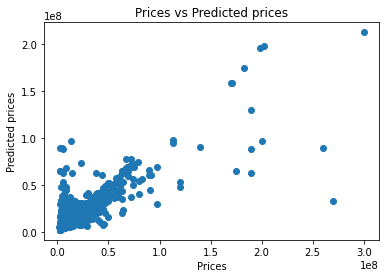

In [41]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

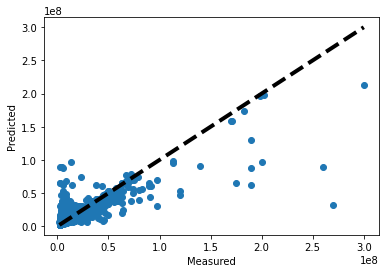

In [42]:
fig, ax = plt.subplots()
ax.scatter(Y_train, Y_pred)
ax.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Testing

In [43]:
Y_test_pred = regressor.predict(X_test)

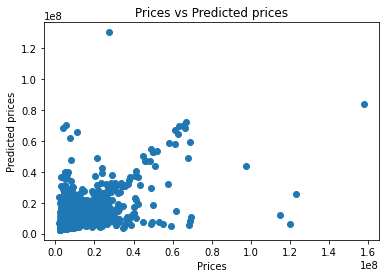

In [44]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

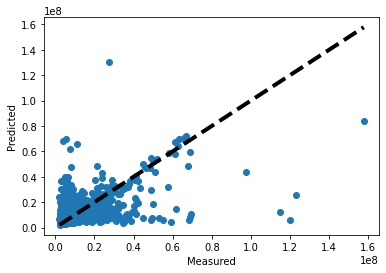

In [45]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_test_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [46]:
acc_rf = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.20279780090421418
Adjusted R^2: 0.18574300893233497
MAE: 4491030.850986586
MSE: 93961882615310.5
RMSE: 9693393.761490889


In [47]:
from sklearn.metrics import explained_variance_score
Random_Forest_Score = regressor.score(X_test, Y_test)
Random_Forest_Score_predicted = explained_variance_score(Y_test_pred, Y_test)
print(Random_Forest_Score, Random_Forest_Score_predicted)

0.20279780090421418 -0.18472604351367217


### K fold Cross Validation

In [48]:
Random_forest_model = RandomForestRegressor()
kfold_validation = KFold(10)

In [49]:
rf_result = cross_val_score(Random_forest_model, independent_var, dependent_var, cv=kfold_validation)
# print(rf_result)
rf_cross_val_result = np.mean(rf_result) * 100

C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sangram Mo

In [138]:
len(regressor.get_params())

17

# Linear Regression

### Training

In [50]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [51]:
X_train = X_train_global
X_test = X_test_global
Y_train = Y_train_global
Y_test = Y_test_global
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [52]:
Y_pred = lm.predict(X_train)

In [53]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.18661266174851765
Adjusted R^2: 0.1792422839158485
MAE: 5723392.755764675
MSE: 190140754395800.2
RMSE: 13789153.505411426


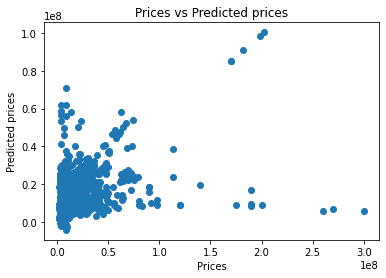

In [54]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Testing

In [55]:
Y_test_pred = lm.predict(X_test)

In [56]:
acc_linreg = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.1618452742650377
Adjusted R^2: 0.1439143722882612
MAE: 5426388.040808536
MSE: 98788733952694.14
RMSE: 9939252.182769796


In [57]:
from sklearn.metrics import explained_variance_score
Linear_Regression_Score = lm.score(X_test, Y_test)
Linear_Regression_Score_predicted = explained_variance_score(Y_test_pred, Y_test)
print(Linear_Regression_Score, Linear_Regression_Score_predicted)

0.1618452742650377 -1.0858667114873963


### K fold Cross Validation

In [58]:
Linear_regression_model = LinearRegression()
kfold_validation = KFold(10)

In [59]:
lr_result = cross_val_score(Linear_regression_model, independent_var, dependent_var, cv=kfold_validation)
# print(lr_result)
lr_cross_val_result = np.mean(lr_result) * 100

# XGBoost

### Training

In [60]:
from xgboost import XGBRegressor

In [61]:
X_train = X_train_global
X_test = X_test_global
Y_train = Y_train_global
Y_test = Y_test_global
reg = XGBRegressor()
reg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [62]:
Y_pred = reg.predict(X_train)

In [63]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.7002814057621533
Adjusted R^2: 0.697565554187972
MAE: 3024743.9802313535
MSE: 70063445710059.96
RMSE: 8370391.012973048


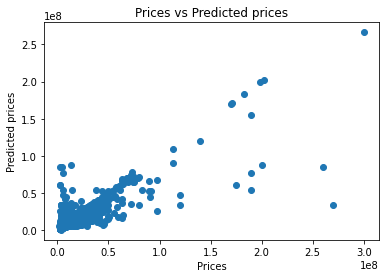

In [64]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Testing

In [65]:
Y_test_pred = reg.predict(X_test)

In [66]:
acc_xgb = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.07096990492151345
Adjusted R^2: 0.051094878202884275
MAE: 4417044.4556494905
MSE: 109499718940648.58
RMSE: 10464211.338684276


In [67]:
from sklearn.metrics import explained_variance_score
XGBoost_Score = reg.score(X_test, Y_test)
XGBoost_Score_predicted = explained_variance_score(Y_test_pred, Y_test)
print(XGBoost_Score, XGBoost_Score_predicted)

0.07096990492151345 -0.17770315230415967


### K fold Cross Validation

In [68]:
XGB_model = XGBRegressor()
kfold_validation = KFold(10)

In [69]:
xgb_result = cross_val_score(XGB_model, independent_var, dependent_var, cv=kfold_validation)
# print(xgb_result)
xgb_cross_val_result = np.mean(xgb_result) * 100

# KNN

### Training

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
X_train = X_train_global
X_test = X_test_global
Y_train = Y_train_global
Y_test = Y_test_global
KNR = KNeighborsRegressor(100)
KNR.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=100)

In [72]:
Y_pred = KNR.predict(X_train)

In [73]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.06644249705424055
Adjusted R^2: 0.057983216706915974
MAE: 6417460.219656998
MSE: 218232224100696.06
RMSE: 14772685.067403829


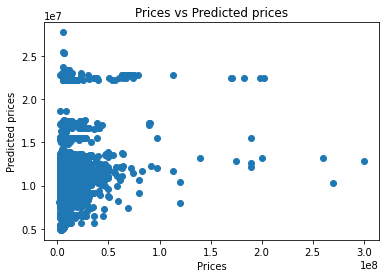

In [74]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Testing

In [75]:
Y_test_pred = KNR.predict(X_test)

In [76]:
acc_KNR = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_KNR)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.05315948360286249
Adjusted R^2: 0.032903433060082254
MAE: 5987738.755373054
MSE: 111598936327618.2
RMSE: 10564039.77309903


In [77]:
print("K Neighbors Regressor R_Squared Score = ", acc_KNR*100)

K Neighbors Regressor R_Squared Score =  5.315948360286249


In [78]:
from sklearn.metrics import explained_variance_score
KNR_Score = KNR.score(X_test, Y_test)
KNR_Score_predicted = explained_variance_score(Y_test_pred, Y_test)
print(KNR_Score, KNR_Score_predicted)

0.05315948360286249 -10.205131679561749


### K fold Cross Validation

In [79]:
KNR_model = KNeighborsRegressor(100)
kfold_validation = KFold(10)

In [80]:
knr_result = cross_val_score(KNR_model, independent_var, dependent_var, cv=kfold_validation)
# print(knr_result)
knr_cross_val_result = np.mean(knr_result) * 100

# Ridge Regression

### Training

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [82]:
X_train = X_train_global
X_test = X_test_global
Y_train = Y_train_global
Y_test = Y_test_global
ridge_regressor = Ridge()
ridge_regressor.fit(X_train,Y_train)

Ridge()

In [83]:
Y_pred = ridge_regressor.predict(X_train)

In [84]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.18603550918702771
Adjusted R^2: 0.1786599015797541
MAE: 5725853.844611444
MSE: 190275671941577.44
RMSE: 13794044.799897434


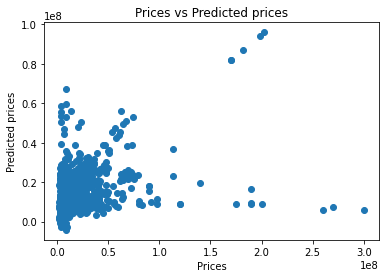

In [85]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### K fold Cross Validation

In [86]:
RR_model = Ridge()
kfold_validation = KFold(10)

In [87]:
rr_result = cross_val_score(RR_model, independent_var, dependent_var, cv=kfold_validation)
# print(rr_result)
rr_cross_val_result = np.mean(rr_result) * 100

### Testing

In [88]:
Y_test_pred = ridge_regressor.predict(X_test)

In [89]:
acc_ridge = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_ridge)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.172373719248345
Adjusted R^2: 0.15466805553506213
MAE: 5416005.724789072
MSE: 97547803467598.47
RMSE: 9876629.1551115


In [90]:
from sklearn.metrics import explained_variance_score
Ridge_Score = ridge_regressor.score(X_test, Y_test)
Ridge_Score_predicted = explained_variance_score(Y_test_pred, Y_test)
print(Ridge_Score, Ridge_Score_predicted)

0.172373719248345 -1.2480935832996871


# Lasso Regression

### Training

In [91]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [92]:
X_train = X_train_global
X_test = X_test_global
Y_train = Y_train_global
Y_test = Y_test_global
lasso_regressor=Lasso()
lasso_regressor.fit(X_train,Y_train)

C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.139e+17, tolerance: 1.015e+14
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [93]:
Y_pred = lasso_regressor.predict(X_train)

In [94]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.18470107588771167
Adjusted R^2: 0.17731337652888757
MAE: 5726554.236278094
MSE: 190587614533120.9
RMSE: 13805347.316642232


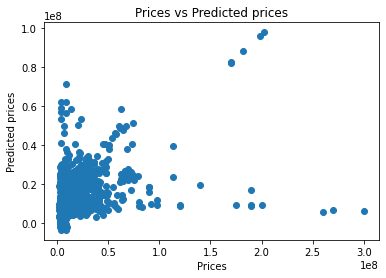

In [95]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Testing

In [96]:
Y_test_pred = ridge_regressor.predict(X_test)

In [97]:
acc_lasso = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_lasso)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.172373719248345
Adjusted R^2: 0.15466805553506213
MAE: 5416005.724789072
MSE: 97547803467598.47
RMSE: 9876629.1551115


In [98]:
from sklearn.metrics import explained_variance_score
Lasso_Score = lasso_regressor.score(X_test, Y_test)
Lasso_Score_predicted = explained_variance_score(Y_test_pred, Y_test)
print(Lasso_Score, Lasso_Score_predicted)

0.16202137925337323 -1.2480935832996871


### K fold Cross Validation

In [99]:
Lasso_model = Lasso()
kfold_validation = KFold(10)

In [100]:
lasso_result = cross_val_score(Lasso_model, independent_var, dependent_var, cv=kfold_validation)
# print(lasso_result)
lasso_cross_val_result = np.mean(lasso_result) * 100

C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.760e+17, tolerance: 1.170e+14
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.798e+17, tolerance: 1.168e+14
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

# Decision Tree

### Training

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
X_train = X_train_global
X_test = X_test_global
Y_train = Y_train_global
Y_test = Y_test_global
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [103]:
Y_pred = tr_regressor.predict(X_train)

In [104]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.7510363345604276
Adjusted R^2: 0.7487803905659706
MAE: 1509368.5573577944
MSE: 58198765751118.6
RMSE: 7628811.555617205


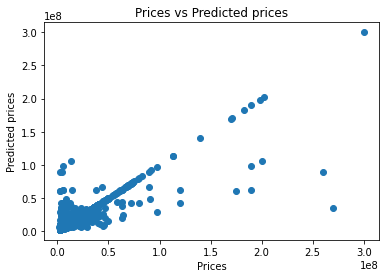

In [105]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### K fold Cross Validation

In [106]:
DT_model = DecisionTreeRegressor(random_state=0)
kfold_validation = KFold(10)

In [107]:
dt_result = cross_val_score(DT_model, independent_var, dependent_var, cv=kfold_validation)
# print(dt_result)
dt_cross_val_result = np.mean(dt_result) * 100

### Testing

In [108]:
Y_test_pred = tr_regressor.predict(X_test)

In [109]:
acc_dc = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_dc)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: -0.1840362012294836
Adjusted R^2: -0.20936665205117855
MAE: 5148436.953409061
MSE: 139555900220033.69
RMSE: 11813378.019010214


In [110]:
from sklearn.metrics import explained_variance_score
Decision_Tree_Score = tr_regressor.score(X_test, Y_test)
Decision_Tree_Score_predicted = explained_variance_score(Y_test_pred, Y_test)
print(Decision_Tree_Score, Decision_Tree_Score_predicted)

-0.1840362012294836 -0.09042222160519664


# Support Vector Machine

### Training

In [111]:
from sklearn.svm import SVR

In [112]:
X_train = X_train_global
X_test = X_test_global
Y_train = Y_train_global
Y_test = Y_test_global
svm = SVR()
svm.fit(X_train,Y_train)

C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [113]:
Y_pred = svm.predict(X_train)

In [114]:
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: -0.0483114902049131
Adjusted R^2: -0.05781059525091492
MAE: 5767096.012886092
MSE: 245057585993206.16
RMSE: 15654315.25149555


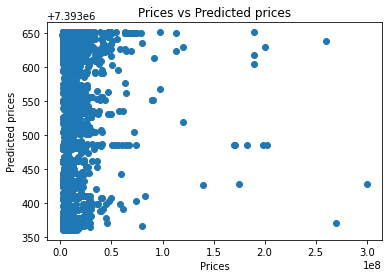

In [115]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Testing

In [116]:
Y_test_pred = svm.predict(X_test)

In [117]:
acc_svm = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: -0.06639319257806786
Adjusted R^2: -0.08920687031287011
MAE: 5178486.669939667
MSE: 125689959330816.28
RMSE: 11211153.345254729


In [118]:
from sklearn.metrics import explained_variance_score
SVM_Score = svm.score(X_test, Y_test)
SVM_Score_predicted = explained_variance_score(Y_test_pred, Y_test)
print(SVM_Score, SVM_Score_predicted)

-0.06639319257806786 -12725716678.154198


### K fold Cross Validation

In [119]:
SVM_model = SVR()
kfold_validation = KFold(10)

In [120]:
svm_result = cross_val_score(SVM_model, independent_var, dependent_var, cv=kfold_validation)
# print(svm_result)
svm_cross_val_result = np.mean(svm_result) * 100

C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\uti

# Results

In [121]:
print("Scores: Model Training")
print("Linear Regression: ", Linear_Regression_Score*100)
print("Decision Tree: " ,Decision_Tree_Score*100)
print("Random Forest: ", Random_Forest_Score*100)
print("Ridge Regression: ", Ridge_Score*100)
print("Lasso Regression: ", Lasso_Score*100)
print("XGBoost Regression: ",XGBoost_Score*100)
print("Support Vector Machine: ", SVM_Score*100)

Scores: Model Training
Linear Regression:  16.18452742650377
Decision Tree:  -18.40362012294836
Random Forest:  20.27978009042142
Ridge Regression:  17.2373719248345
Lasso Regression:  16.202137925337322
XGBoost Regression:  7.096990492151345
Support Vector Machine:  -6.639319257806786


In [122]:
print("Explained Variance Score")
print("Linear Regression: ", Linear_Regression_Score_predicted*100)
print("Decision Tree: " ,Decision_Tree_Score_predicted*100)
print("Random Forest: ", Random_Forest_Score_predicted*100)
print("Ridge Regression: ", Ridge_Score_predicted*100)
print("Lasso Regression: ", Lasso_Score_predicted*100)
print("XGBoost Regression: ",XGBoost_Score_predicted*100)
print("Support Vector Machine: ", SVM_Score_predicted*100)

Explained Variance Score
Linear Regression:  -108.58667114873964
Decision Tree:  -9.042222160519664
Random Forest:  -18.472604351367217
Ridge Regression:  -124.80935832996872
Lasso Regression:  -124.80935832996872
XGBoost Regression:  -17.770315230415967
Support Vector Machine:  -1272571667815.4197


In [123]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'KNR', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'SVM'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_KNR*100, acc_ridge*100, acc_lasso*100, acc_dc*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,20.279780
4,Ridge Regression,17.237372
5,Lasso Regression,17.237372
0,Linear Regression,16.184527
2,XGBoost,7.096990
3,KNR,5.315948
7,SVM,-6.639319
6,Decision Tree,-18.403620


In [124]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'KNR', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'SVM'],
    'Cross Validation Score': [lr_cross_val_result, rf_cross_val_result, xgb_cross_val_result, knr_cross_val_result, rr_cross_val_result, lasso_cross_val_result, dt_cross_val_result, svm_cross_val_result]})
models.sort_values(by='Cross Validation Score', ascending=False)

,Model,Cross Validation Score
4,Ridge Regression,17.984783
0,Linear Regression,17.932580
5,Lasso Regression,17.863028
1,Random Forest,14.882042
2,XGBoost,11.987370
3,KNR,6.798476
7,SVM,-5.575002
6,Decision Tree,-17.268000
